# Pandas

## Pandas Series Creation and Indexing


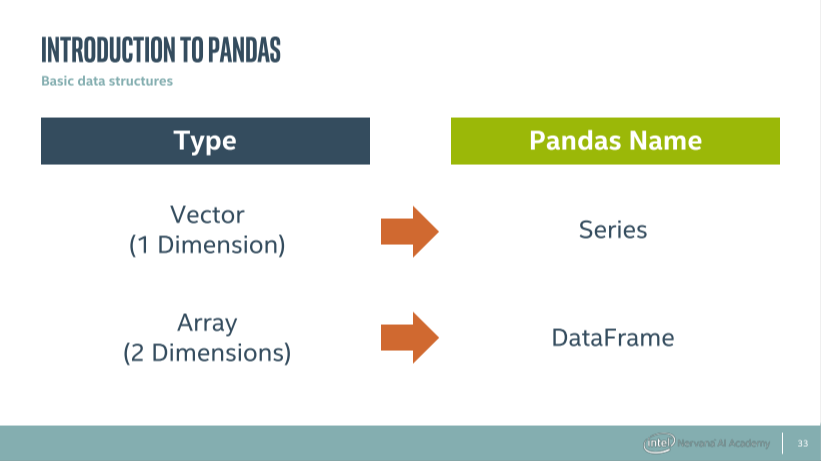
__Pandas series__ :
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

The method pd.Series allows the conversion of an array into a panda series:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


Using an array of dates as label for the previous step data. This also allows indexing through the array:

In [2]:
step_counts.index = pd.date_range('20150329',periods=step_counts.size)
print(step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [3]:
# Just like a dictionary
print(step_counts['2015-04-01'])
# Or by index position—like an array
print(step_counts[3])

3907
3907


The select is aware of the label type (date), and allows for semantic filtering of the series:

In [4]:
# Select all of April
print(step_counts['2015-04'])

2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


## Pandas Data Types and Imputation

_Data types can be viewed and converted_

In [5]:
# View the data type 
print(step_counts.dtypes)
# Convert to a float 
step_counts = step_counts.astype(np.float)
# View the data type
print(step_counts.dtypes)

int64
float64


### .fillna() ###
Invalid data points can be easily filled with values:

In [6]:
# Create invalid data 
step_counts[1:3] = np.NaN
# Now fill it in with zeros
step_counts = step_counts.fillna(0.) 
# equivalently,
# step_counts.fillna(0., inplace=True)
print(step_counts[1:3])

2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


### pd.DataFrame() ###
_DataFrames can be created from lists, dictionaries, and Pandas Series:_

In [7]:
# Cycling distance 
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]
# Create a tuple of data 
# [zip makes an iterator that aggregates elements from each of the iterables.]
joined_data = list(zip(step_data, cycling_data))
# The dataframe
activity_df = pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


Labeled columns and an index can be added:

In [8]:
# Add column names to dataframe 
activity_df = pd.DataFrame(joined_data, 
                           index=pd.date_range('20150329', periods=6),
                           columns=['Walking','Cycling'])
print(activity_df)


            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


### .loc(), .iloc() 
DataFrame rows can be indexed by row using the 'loc' and 'iloc' methods

In [9]:
# Select row of data by index name 
print(activity_df.loc['2015-04-01'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [10]:
print(activity_df.iloc[-3])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


DataFrame columns can be indexed by name

In [11]:
print(activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


DataFrame columns can also be indexed as properties

In [12]:
print(activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


DataFrame columns can be indexed by integer

In [13]:
# First column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


CSV and other common filetypes can be read with a single command

In [14]:
# The location of the data file 
filepath = 'data/Iris_Data.csv'
# Import the data 
data = pd.read_csv(filepath)
# Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


data can be (re)assigned to a DataFrame column OUTPUT

In [15]:
# Create a new column that is a product
# of both measurements 
data['sepal_area'] = data.sepal_length *data.sepal_width
# Print a few rows and columns
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


Functions can be applied to columns or rows of a DataFrame or Series

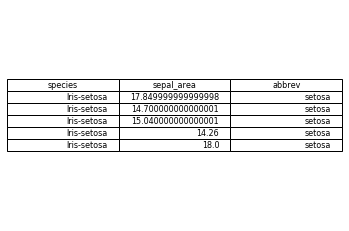

In [16]:
# The lambda function applies what
# follows it to each row of data 
data['abbrev'] = (data
                    .species 
                    .apply(lambda x: x.replace('Iris-','')))
# Note that there are other ways to accomplish the above
plt.axis('off')
df = data[0:5]
plt.table(cellText=df.values[0:5,-3:], colLabels=df.columns[-3:], loc='center')
plt.show()

Two DataFrames can be concatenated along either dimension

In [17]:
# Concatenate the first two and 
# last two rows 
small_data = pd.concat([data.iloc[:2], data.iloc[-2:]])
print(small_data.iloc[:,-3:])
# See the 'join' method for
# SQL style joining of dataframe

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


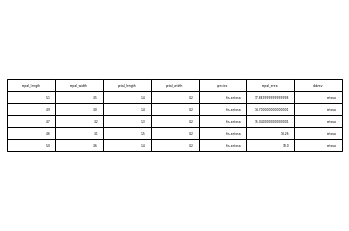

In [18]:
plt.axis('off')
plt.table(cellText=df.values[0:10], colLabels=df.columns, loc='center')
plt.show()

Using the groupby method calculated aggregated DataFrame statistics

In [19]:
# Use the size method with a 
# DataFrame to get count 
# For a Series, use the .value_counts 
# method 
group_sizes = (data
               .groupby('species')
               .size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Pandas contains a variety of statistical methods—mean, median, and mode

In [20]:
# Mean calculated on a DataFrame
print(data.mean())
# Median calculated on a Series 
print(data.petal_length.median())
# Mode calculated on a Series
print(data.petal_length.mode())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64


Standard deviation, variance, SEM, and quantiles can also be calculated

In [21]:
# Standard dev, variance, and SEM 
print(data.petal_length.std(), data.petal_length.var(),
data.petal_length.sem())

1.7644204199522626 3.113179418344519 0.1440643240210085


In [22]:
# As well as quantiles 
print(data.quantile(0))

sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


Multiple calculations can be presented in a DataFrame

In [23]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


DataFrames can be randomly sampled from

In [24]:
# Sample 5 rows without replacement
sample = (data.sample(n=5,
replace=False, random_state=44))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
144   Iris-virginica       22.11   virginica
9        Iris-setosa       15.19      setosa
79   Iris-versicolor       14.82  versicolor
95   Iris-versicolor       17.10  versicolor
104   Iris-virginica       19.50   virginica


# Data visualization

### Basic Scatter Plots with Matplotlib

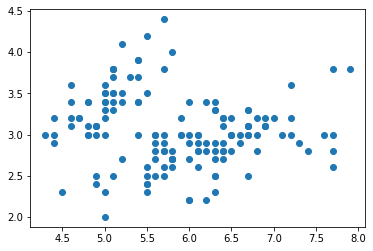

In [25]:
import matplotlib.pyplot as plt

_ = plt.plot(data.sepal_length,
    data.sepal_width,
    ls ='', marker='o')


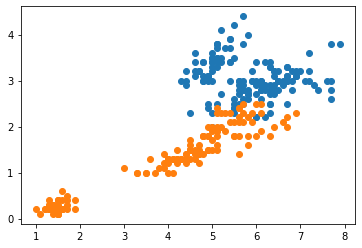

In [26]:
_ = plt.plot(data.sepal_length,
    data.sepal_width,
    ls ='', marker='o',
    label='sepal')
_ = plt.plot(data.petal_length,
    data.petal_width,
    ls ='', marker='o',
    label='petal')

### Histograms

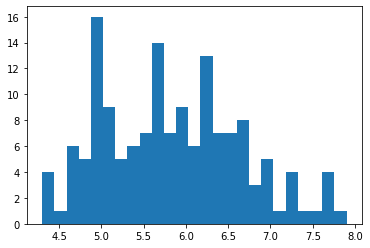

In [27]:
_ =plt.hist(data.sepal_length, bins=25)

### Customization

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

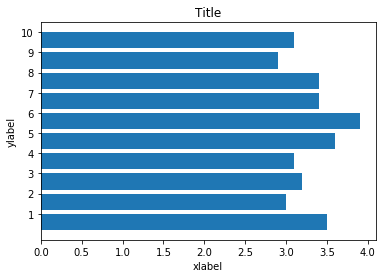

In [28]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),
    data.sepal_width.iloc[:10])
    # Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel',
    title='Title')

### Incorporating Statistical Calculations

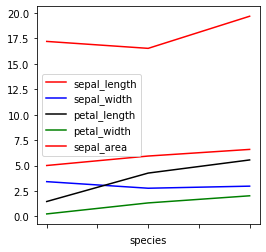

In [29]:
_ = (data
    .groupby('species')
    .mean()
    .plot(color=['red','blue',
    'black','green'],
    fontsize=10.0, figsize=(4,4)))

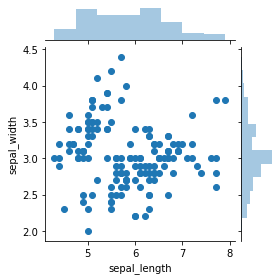

In [30]:
import seaborn as sns
tupledData = []
for row in df.itertuples():
    tupledData[len(tupledData):] = [row]
_ = sns.jointplot(x='sepal_length',
    y='sepal_width',
    data=data, height=4)

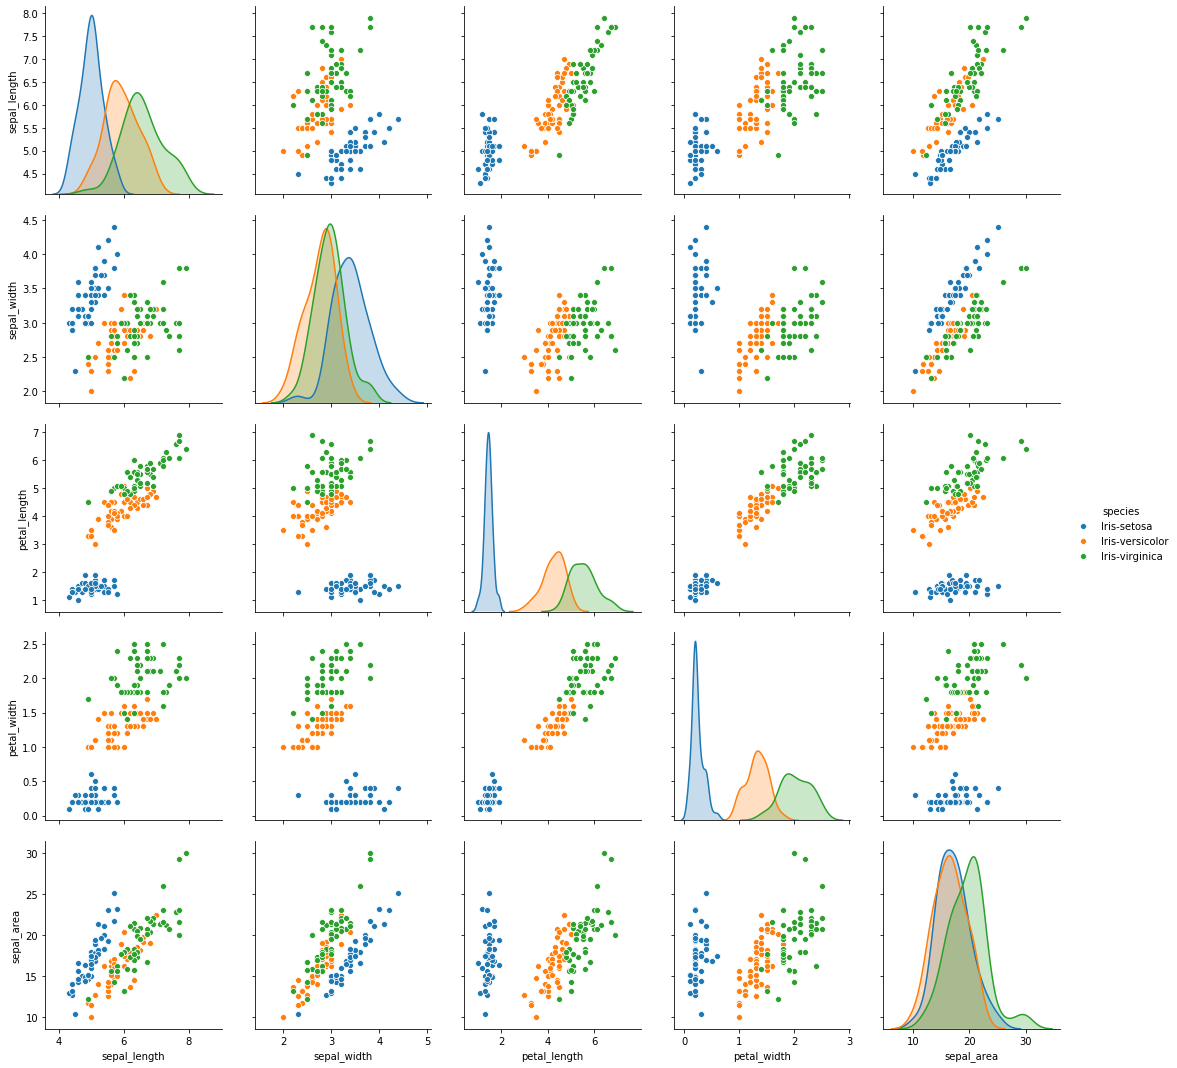

In [31]:
sns.pairplot(data, hue='species', height=3)